<a href="https://colab.research.google.com/github/otoperalias/teaching/blob/TallerUTE_AnalisisCuanti/UTE_TallerAnalisisCuanti_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/otoperalias/teaching/blob/TallerUTE_AnalisisCuanti/material/6.%20M%C3%89TODOS%20CUANTITATIVOS%20WORKSHOP%20(1).jpg?raw=true" alt="drawing" width="900"/>



## Taller de Análisis de Datos Cuantitativos

### Maestría en Urbanismo (UTE, Ecuador).

Instructor: [Daniel Oto-Peralías](https://otoperalias.github.io/)
_________________________

El objetivo del taller es aprender a explotar una encuesta o un censo a través de programas estadísticos de análisis cuantitativo.

Usaremos el [Censo de Población y Vivienda de Ecuador (2010)](https://www.ecuadorencifras.gob.ec/censo-de-poblacion-y-vivienda/) para analizar las características de las viviendas de la provincia de Loja. La tarea a realizar será la creación de un indicador de calidad de las viviendas.

**Vamos a necesitar el siguiente material:**
1. Los [datos del censo](https://www.ecuadorencifras.gob.ec/base-de-datos-censo-de-poblacion-y-vivienda/): en *A NIVEL DE SECTOR*, hacemos clic en *Censo Población y Vivienda 2010* y luego seleccionamos *Loja  (formato CSV)*.  
Nótese que al realizar la descarga, se obtiene una carpeta comprimida. Una vez descomprimida, vemos que dentro hay 4 carpetas comprimidas, una de ellas "Loja_CSV_Vivienda", que es la que vamos a utilizar. Esta última carpeta no debe descomprimirse ya que se importa directamente comprimida.
2. El [cuestionario del censo](https://www.ecuadorencifras.gob.ec//wp-content/descargas/Poblacion_y_demo/Cuestionario_censal/cuestionario_censal.pdf), donde podemos ver el significado de los códigos numéricos que aparecen en los datos.
3. El diccionario de datos del censo, para conocer el significado de cada variable. Se puede obtener a través de [este enlace](https://aplicaciones3.ecuadorencifras.gob.ec/BIINEC-war/index.xhtml?oe=CENSOS%20DE%20POBLACI%D3N%20Y%20VIVIENDA%20NACIONAL&a=2010&m=DECENAL&t=Datos%20Abiertos%20CSV), clicando en *Datos Abiertos CSV*, pero para evitaros tener que descargar dicho archivo tan pesado (~1GB), lo proporciono en [este enlace](https://github.com/otoperalias/teaching/raw/TallerUTE_AnalisisCuanti/material/Diccionario%20de%20Datos%20CPV2010.xls).
4. Además, es útil tener a mano esta publicación con una descripción de los resultados del Censo para la provincia de Loja. Disponible [aquí](https://www.ecuadorencifras.gob.ec/censo-de-poblacion-y-vivienda/), clicando en *Resultados provinciales* en *Loja*.
5. Por ultimo, descargamos las capas geográficas del *Clasificador Geográfico Estadístico*, disponible en el [portal de Geografía Estadística del INEC](https://www.ecuadorencifras.gob.ec/documentos/web-inec/Geografia_Estadistica/Micrositio_geoportal/index.html). Le damos al ratón para abajo hasta la sección **Clasificador Geográfico Estadístico**, seleccionamos "2010-CENSAL" y clicamos en el icono "zip SHP". Nótese que descargamos una carpeta comprimida con tres capas geográficas (provincias, cantones y parroquias). Debemos descomprimir este fichero.

**Sobre el programa informático:**

* En este taller usamos [**Google Colab**](https://colab.research.google.com/?hl=es), que es un *notebook* virtual desde el que podemos usar **Python**.
* La librería principal que vamos a usar es **Pandas**, una "paquete" especializado en el procesamiento y análisis de datos cuantitativos.
* La gran ventaja de Python-Pandas frente a otras alternativas (SPSS/Stata/etc.) es su carácter gratuito y la gran cantidad de recursos de ayuda que existe en Internet, debido a su enorme comunidad de usuarios.

## 1. Importamos las librerías que vamos a utilizar

Para usar el paquete de **Pandas** y poder visualizar los datos, tenemos que importar estas librerías:

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importamos los datos


Para importar los datos, en primer lugar, tenemos que descargar los datos en nuestro ordenador y subirlos a Google Colab:
1. Clicamos en el icono de carpeta que hay en la parte superior de la barra de la izquierda (📁) y entonces clicamos en el primer icono de upload.
2. Se abre una ventana para seleccionar el archivo que queremos subir y seleccionamos la carpeta comprimida "Loja_CSV_Vivienda".

Una vez que tenemos subido el fichero y que aparece como tal ("Loja_CSV_Vivienda.zip") en la barra izquierda, podemos importarlo:

In [3]:
viv=pd.read_csv("Loja_CSV_Vivienda.zip",compression='zip')

Para visualizar la tabla, escribimos el nombre que le hemos dado

In [4]:
viv

,I01,I02,I03,I04,I05,I09,I10,URV,VTV,VAP,...,V11,V12A,V12B,V13,V14,V15,V16,TOTPER,TOTDOR,TOTEMI
0,11,1,50,1,1,1,1,1,1,3,...,1,05,00,1,3,1,1,4,1,
1,11,1,50,1,1,2,1,1,4,3,...,1,00,03,1,1,1,1,4,1,
2,11,1,50,1,1,3,1,1,6,3,...,,,,,,,,0,,
3,11,1,50,1,1,4,1,1,1,3,...,1,02,08,1,3,1,1,5,2,
4,11,1,50,1,1,5,1,1,4,3,...,,,,,,,,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155312,11,16,51,999,5,68,1,2,1,4,...,1,05,00,2,3,1,1,2,2,
155313,11,16,51,999,5,69,1,2,1,4,...,1,00,05,2,3,1,1,1,2,
155314,11,16,51,999,5,70,1,2,1,4,...,1,00,03,2,2,1,1,1,1,
155315,11,16,51,999,5,71,1,2,1,4,...,1,00,04,2,2,1,1,1,2,


Como se observa, esta tabla de datos (```dataframe```) tiene 155317 filas y 31 columnas. Cada fila contiene los datos censales de una vivienda.  
En los ```dataframe``` las filas se identifican con un ```index```, que generalmente es único para cada fila. Las columnas se identifican con un nombre. No debe confundirse el index de la tabla con una columna. Es decir, el index no es la primera columna.

<img src="https://github.com/otoperalias/teaching/blob/TallerUTE_AnalisisCuanti/material/df_structure.jpg?raw=true" alt="drawing" width="550"/>

## 3. Exploración inicial

Para conocer las columnas que contiene la tabla, escribimos el siguiente código:

In [5]:
viv.columns

Index(['I01', 'I02', 'I03', 'I04', 'I05', 'I09', 'I10', 'URV', 'VTV', 'VAP',
       'VCO', 'V01', 'V03', 'V05', 'V02', 'V04', 'V06', 'V07', 'V08', 'V09',
       'V10', 'V11', 'V12A', 'V12B', 'V13', 'V14', 'V15', 'V16', 'TOTPER',
       'TOTDOR', 'TOTEMI'],
      dtype='object')

Nótese que necesitamos el diccionario de datos del censo para conocer el significado de cada columna. Por otra parte, para saber el significado de los diferentes valores que toman las variables, necesitamos el cuestionario del censo. Ambos documentos se mencionan al comienzo de este notebook.

Para obtener el número de filas de la tabla (o sea, su longitud) escribimos lo siguiente:

In [6]:
len(viv)

155317

Podemos comprobar en el PDF con los resultados para Loja que en esta provincia hay 155308 viviendas. La pequeña diferencia se debe a que hay 9 cuestionarios de hogares sin viviendas (código 17 en la variable VTV).  
La función ```value_counts()``` nos da la distribución de frecuencias de una variable.

In [7]:
# Tipo de Vivienda
viv["VTV"].value_counts()

1     121940
2      12593
4       8056
3       7428
6       1680
5       1393
7       1351
8        605
9         75
10        59
14        54
13        25
16        24
11         9
17         9
15         9
12         7
Name: VTV, dtype: int64

En cuanto a terminología, las palabras *variable*, *campo* y *columna* se refieren a lo mismo. En inglés, *variable*, *field* y *column*.

Ahora creamos un gráfico similar al del PDF (página 7: *¿Qué tipo de vivienda tenemos?*):

<Axes: xlabel='VTV', ylabel='Percent'>

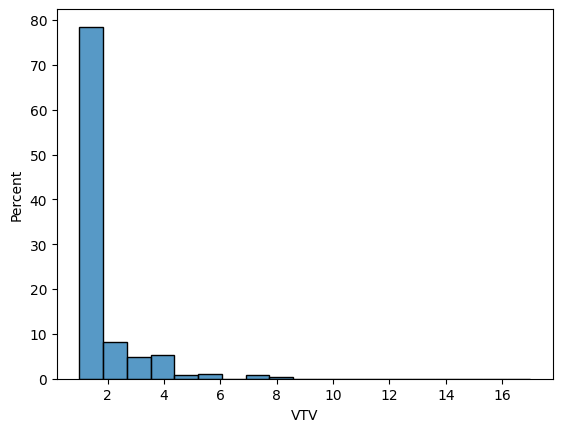

In [8]:
sns.histplot(data=viv,x="VTV",stat="percent")

El siguiente bloque de código procesa ligeramente los datos para crear un gráfico más entendible. En concreto, creamos una nueva variable en la que asignamos a cada código numérico su etiqueta.

In [9]:
# Procesamos los datos para mejorar el gráfico
viv['tipov']="" # Añadimos una nueva columna y en las líneas de código siguientes le damos contenido según los códigos de la columna VTV
viv.loc[viv['VTV']==1,'tipov']="Casa/Villa"
viv.loc[viv['VTV']==2,'tipov']="Departamento"
viv.loc[viv['VTV']==3,'tipov']="Cuarto"
viv.loc[viv['VTV']==4,'tipov']="Mediagua"
viv.loc[viv['VTV']==5,'tipov']="Rancho"
viv.loc[(viv['VTV']==6) | (viv['VTV']==7),'tipov']="Covacha/Choza"
viv.loc[(viv['VTV']==8),'tipov']="Otro"

Ahora filtramos los datos para centrarnos en las viviendas particulares (excluyendo las colectivas):

In [33]:
vivpar=viv.loc[viv['VTV']<=8].copy()

Para que las barras del gráfico salgan ordenadas según el código de la variable VTV, ordenamos la tabla por dicha variable:

In [34]:
vivpar=vivpar.sort_values("VTV")

Creamos el gráfico:

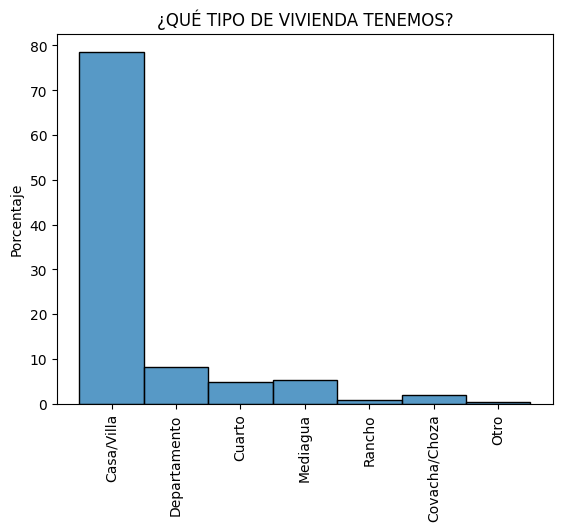

In [12]:
fig,ax=plt.subplots()  # Aquí se indica que queremos crear una figura (fig) que contiene un gráfico (ax)
sns.histplot(data=vivpar,x="tipov",stat="percent",ax=ax)  # Se indica que queremos representar un histograma, que muestre los porcentajes
ax.tick_params(axis='x', rotation=90) # Etiquetas del eje x giradas 90 grados para visualizarse mejor.
ax.set_ylabel("Porcentaje") # Título del eje y, donde se indica la unidad de medida
ax.set_xlabel("")  # No queremos título en el eje x, porque se sobre entiende.
ax.set_title("¿QUÉ TIPO DE VIVIENDA TENEMOS?")  # Título de la figura
plt.show() # Comando para que se dibuje el gráfico.

## 4. Construcción del indicador de calidad de las viviendas

### 4.1. Diseño del indicador.


Nuestro objetivo es construir un indicador sintético o compuesto de calidad de las viviendas. Los indicadores sintéticos se construyen para medir algo que no es directamente cuantificable. Por ejemplo, la altura de los edificios o el material del suelo sí es observable y cuantificable directamente, pero *la calidad* de las viviendas depende del criterio que fije el investigador. Por tanto, lo primero que hay que hacer es definir el concepto de calidad de la vivienda y, posteriormente, operacionalizarlo.  
**En general, hay que seguir estos pasos:**
1. **Conceptualización**: definir el fenómeno que se quiere medir.
2. **Dimensiones**: precisar las dimensiones del fenómeno a medir.  
3. **Indicadores parciales**: qué indicadores vamos a utilizar para medir cada dimensión.
4. **Variables simples**: las variables que van a formar parte de cada indicador parcial.
5. **Método de agregación**: decidir el método de agregación de las variables simples en indicadores parciales, de los indicadores parciales en dimensiones y de las dimensiones en el indicador sintético. La media aritmética es el método más sencillo e implica que los diferentes componentes tienen la misma importancia y se compensan perfectamente entre sí (es decir, un valor alto en uno compensa un valor bajo en otro). Otros métodos son, por ejemplo, la media ponderada, donde a cada componente se le asigna un peso diferente, y la media geométrica, que evita que los componentes sean directamente compensables entre sí.

Aplicado al indicador que queremos construir:
1.  Definimos la calidad de la vivienda como el grado de confort, salubridad y seguridad del inmueble.
2. Tenemos tres dimensiones: calidad de los materiales, estado de conservación y nivel de salubridad.
3. Vamos a usar los siguientes indicadores parciales:
 * Calidad de los materiales: material predominante en el techo (V01), paredes (V03) y piso (V05).
 * Estado de conservación: del techo (V02), paredes (V04) y suelo (V06).
 * Salubridad: suministro de agua por red pública (V7), conectado a alcantarillado (V09) y basura al carro corrector (V13).
4. En el punto anterior se incluye entre paréntesis las variables del censo que vamos a utilizar.
5. El método de agregación será siempre, por sencillez, la media aritmética.

### 4.2. Variables simples.

#### 4.2.1. Calidad de materiales

In [35]:
# Techo (1 si hormigón o teja; 0 en los demás casos)
vivpar['techo_mat']=0
vivpar.loc[((vivpar['V01']=="1") | (vivpar['V01']=="4")), 'techo_mat']=1

# Pared (1 si hormigón o ladrillo-bloque; 0 en los demás casos)
vivpar['pared_mat']=0
vivpar.loc[((vivpar['V03']=="1") | (vivpar['V03']=="2")), 'pared_mat']=1

# Piso (1 si madera tratada (duela, parquet...) o baldosas-cerámica; 0 en los demás casos)
vivpar['piso_mat']=0
vivpar.loc[((vivpar['V05']=="1") | (vivpar['V05']=="3")), 'piso_mat']=1

# Echamos un vistazo a las variables creadas
vivpar[['techo_mat','pared_mat','piso_mat']].describe()

,techo_mat,pared_mat,piso_mat
count,155046.000000,155046.000000,155046.000000
mean,0.529585,0.429389,0.252106
std,0.499126,0.494991,0.434223
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


#### 4.2.2. Estado de conservación



In [36]:
# Techo (1 si bueno, 0 el resto)
vivpar['techo_est']=0
vivpar.loc[(vivpar['V02']=="1") , 'techo_est']=1

# Paredes (1 si bueno, 0 el resto)
vivpar['pared_est']=0
vivpar.loc[(vivpar['V04']=="1") , 'pared_est']=1

# Suelo (1 si bueno, 0 el resto)
vivpar['piso_est']=0
vivpar.loc[(vivpar['V06']=="1") , 'piso_est']=1

# Echamos un vistazo a las variables creadas
vivpar[['techo_est','pared_est','piso_est']].describe()

,techo_est,pared_est,piso_est
count,155046.000000,155046.000000,155046.000000
mean,0.287057,0.316874,0.287792
std,0.452390,0.465259,0.452735
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


#### 4.2.3. Salubridad

In [37]:
# Suministro de agua (1 si red pública; 0 el resto)
vivpar['agua']=0
vivpar.loc[(vivpar['V07']=="1") , 'agua']=1

# Alcantarillado (1 si red pública o pozo séptico, 0 el resto)
vivpar['alcant']=0
vivpar.loc[((vivpar['V09']=="1") | (vivpar['V09']=="2") ), 'alcant']=1

# Basura (1 si carro colector, 0 el resto)
vivpar['basura']=0
vivpar.loc[(vivpar['V13']=="1") , 'basura']=1

# Echamos un vistazo a las variables creadas
vivpar[['agua','alcant','basura']].describe()

,agua,alcant,basura
count,155046.000000,155046.000000,155046.000000
mean,0.519852,0.524715,0.441908
std,0.499607,0.499390,0.496615
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


### 4.3. Construcción de los indicadores parciales

In [38]:
# Calidad de materiales
vivpar["material"]=(vivpar['techo_mat']+vivpar['pared_mat']+vivpar['piso_mat'])/3
# Estado de conservación
vivpar["estado"]=(vivpar['techo_est']+vivpar['pared_est']+vivpar['piso_est'])/3
# Salubridad
vivpar["salu"]=(vivpar['agua']+vivpar['alcant']+vivpar['basura'])/3

# Echamos un vistazo a los indicadores parciales creados
vivpar[['material','estado','salu']].describe()

,material,estado,salu
count,155046.000000,155046.000000,155046.000000
mean,0.403693,0.297241,0.495492
std,0.365249,0.407873,0.448708
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.333333,0.000000,0.333333
75%,0.666667,0.666667,1.000000
max,1.000000,1.000000,1.000000


**Nota metodológica**: nótese que en este caso todas las variables son directamente agregables, ya que tienen escala de 0 a 1. Si las escalas fueran diferentes habría que estandarizar las variables primero para convertirlas a la misma escala. De lo contrario, las variables con una escala mayor (por ejemplo, de 0 a 100) pesarían más en el indicador.

### 4.4. Construcción del indicador sintético

In [39]:
# Indicador sintético de calidad de las viviendas:
vivpar["calidad"]=(vivpar['material']+vivpar['alcant']+vivpar['basura'])/3

# Echamos un vistazo a los indicadores parciales creados
vivpar['calidad'].describe()

count    155046.000000
mean          0.456772
std           0.406418
min           0.000000
25%           0.000000
50%           0.444444
75%           0.888889
max           1.000000
Name: calidad, dtype: float64

<Axes: xlabel='calidad', ylabel='Percent'>

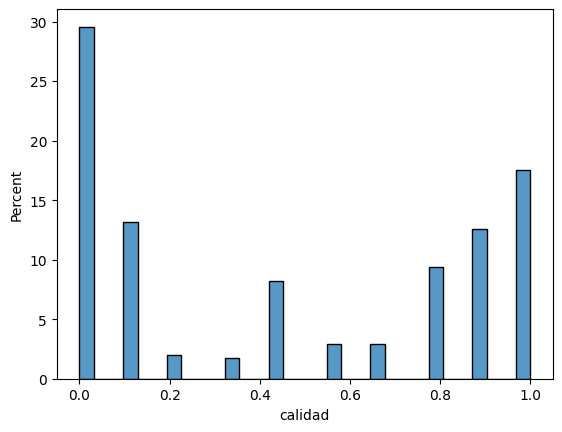

In [40]:
# Distribución de frecuencias
sns.histplot(data=vivpar,x="calidad",stat="percent")

## 5. Agregaciones espaciales

Hasta ahora hemos estado usando datos individuales (a nivel de vivienda), pero con frecuencia nos interesa conocer los datos agregados de diferentes unidades geográficas, como la parroquia o el cantón.  
Vamos a agrupar las filas de la tabla por parroquias usando la función ```groupby()```.

Primero vamos a crear una variable con el código identificativo de cada parroquia. Según el INEC, el código de la parroquia es la concatenación de los dos dígitos del código provincial, los dos del cantonal y los dos del parroquial.

In [41]:
# 1. Convertimos las columnas o variables a usar en formato texto o string (str)
vivpar['prov']=vivpar['I01'].astype(str) # 2 dígitos provincia
vivpar['cant']=vivpar['I02'].astype(str) # 1/2 dígitos cantón
vivpar['parr']=vivpar['I03'].astype(str) # 2 dígitos parroquia

# 2. Añadimos 0 al código cantonal cuando el valor es menor que 10 y, en consecuencia, tiene solo un dígito. Al hacer esto, conseguimos que tenga 2 dígitos.
vivpar.loc[(vivpar['I02']<10),'cant']="0"+vivpar['cant']

# 3. Creamos la variable identificativa de cada parroquia:
vivpar['DPA_PARROQ']=vivpar['prov']+vivpar['cant']+vivpar['parr']


Ahora ya podemos agrupar por parroquias usando la función ```groupby()```.

In [55]:
columnas=['DPA_PARROQ','material', 'estado', 'salu', 'calidad']
viv_parroq=vivpar[columnas].groupby('DPA_PARROQ').mean()


Esta es la tabla agregada a nivel parroquial:

In [56]:
viv_parroq

,material,estado,salu,calidad
DPA_PARROQ,,,,
110150,0.611349,0.480127,0.758559,0.714593
110151,0.189995,0.098124,0.176527,0.145583
110152,0.200048,0.130884,0.135687,0.144973
110153,0.201048,0.132940,0.299935,0.248745
110154,0.216092,0.122167,0.133333,0.127531
...,...,...,...,...
111550,0.308201,0.162037,0.343585,0.330578
111551,0.315068,0.150685,0.666667,0.529680
111552,0.273237,0.118590,0.384615,0.339476


Obsérvese que la función ```mean()``` tiene sentido para agregar estas variables, pero téngase en cuenta que este no siempre es el caso.

Ahora vamos a echar un vistazo a la distribución de frecuencias a este nivel agregado:

<Axes: xlabel='calidad', ylabel='Percent'>

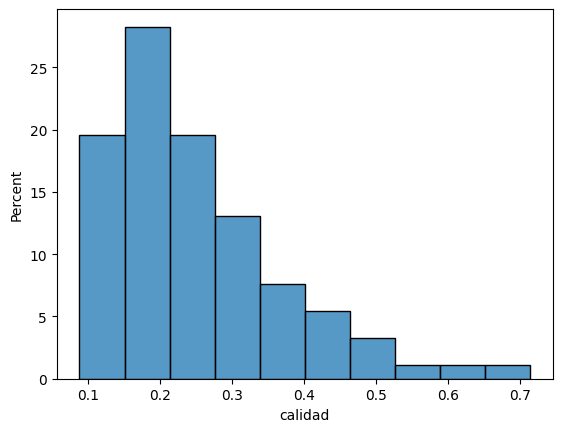

In [57]:
sns.histplot(data=viv_parroq,x="calidad",stat="percent")

## 6. Representación geográfica

A continuación vamos a representar los datos geográficamente. Para ello, tenemos que importar la capa geográfica de parroquias de Ecuador. Dicha capa la descargamos inicialmente y la debemos tener descomprimida en nuestro ordenador. Debemos subir a Google Colab todos los archivos con el nombre *nxparroquias* (7 en total).

Leemos el archivo para crear la capa geográfica. Usamos el módilo ```geopandas```importando como ```gpd```:

In [60]:
parroquias=gpd.read_file("nxparroquias.shp")

Echamos un vistazo a la tabla:

In [61]:
parroquias

,DPA_PARROQ,DPA_DESPAR,DPA_VALOR,DPA_ANIO,DPA_CANTON,DPA_DESCAN,DPA_PROVIN,DPA_DESPRO,geometry
0,020150,GUARANDA,0,2010,0201,GUARANDA,02,BOLIVAR,"POLYGON ((736004.379 9838239.905, 736006.324 9..."
1,020151,FACUNDO VELA,0,2010,0201,GUARANDA,02,BOLIVAR,"POLYGON ((716027.651 9868847.197, 716028.320 9..."
2,020153,JULIO E. MORENO (CATANAHUAN GRANDE),0,2010,0201,GUARANDA,02,BOLIVAR,"POLYGON ((721344.030 9824034.783, 721314.366 9..."
3,020155,SALINAS,0,2010,0201,GUARANDA,02,BOLIVAR,"POLYGON ((705426.023 9858768.396, 705493.833 9..."
4,020156,SAN LORENZO,0,2010,0201,GUARANDA,02,BOLIVAR,"POLYGON ((737792.824 9814211.296, 738001.238 9..."
...,...,...,...,...,...,...,...,...,...
1019,200250,PUERTO VILLAMIL,0,2010,2002,ISABELA,20,GALAPAGOS,"MULTIPOLYGON (((-613308.416 9890369.494, -6133..."
1020,240250,LA LIBERTAD,0,2010,2402,LA LIBERTAD,24,SANTA ELENA,"POLYGON ((512654.490 9755376.641, 512687.118 9..."
1021,141251,SAN JOSE DE MORONA,0,2010,1412,TIWINTZA,14,MORONA SANTIAGO,"POLYGON ((879459.229 9693179.474, 879479.726 9..."
1022,170353,CUTUGLAHUA,0,2010,1703,MEJIA,17,PICHINCHA,"MULTIPOLYGON (((771785.822 9956456.918, 771788..."


Vemos que hay una columna denominada DPA_PARROQ, con el código identificativo de cada parroquia. Otra que nos interesa contiene el nombre de cada parroquia y también otra importante es la denominada "geometry". Esta última contiene la información geográfica.

Con ```geopandas```es muy fácil representar gráficamente:

<Axes: >

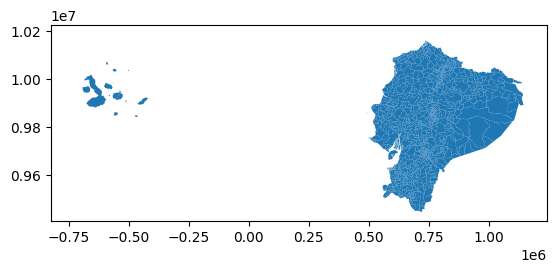

In [62]:
parroquias.plot()

El sistema de coordenadas geográficas puede consultarse con la propiedad ```crs```:

In [63]:
parroquias.crs

<Projected CRS: EPSG:32717>
Name: WGS 84 / UTM zone 17S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 84°W and 78°W, southern hemisphere between 80°S and equator, onshore and offshore. Ecuador. Peru.
- bounds: (-84.0, -80.0, -78.0, 0.0)
Coordinate Operation:
- name: UTM zone 17S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Solo necesitamos las parroquias de Loja. Por tanto, aplicamos el siguiente filtro:

## Ejercicios propuestos

**Partiendo de la tabla vpo_c:**
1. Crear un gráfico de barras donde se represente el total de personas de cada cantón. Tratad que las barras aparezcan ordenadas de menor a mayor.
2. Crear una nueva variable que sea el procentaje de viviendas con suelo en buen estado. Una vez creada, calcular la media, el valor máximo y el mínimo.

**Partiedo de la tabla vpo:**
1. Calcular el porcentaje de viviendas que eliminan principalmente la basura a través de carro recolector. Calcular tanto el porcentaje global para la provincia de Loja así como para sus 16 cantones.
2. Calcular el porcentaje de viviendas que cuentan con un medidor de energía eléctrica de uso exclusivo. Calcular tanto el porcentaje global para la provincia de Loja así como para sus 16 cantones.
3. Explorar si existe correlación, a nivel cantonal, entre las tasas creadas en el punto 1 y 2.


---

**Consejos básicos**:  
Al principio, la mejor manera de escribir código es reutilizando código ya escrito y adaptándolo a nuestras necesidades. Por ejemplo, los ejercicios propuestos se pueden realizar fácilmente usando el código que se proporciona en este notebook, simplemente introduciendo modificaciones mínimas.  
Hay que tener en cuenta que cualquier mínimo error al escribir el código, por pequeño que sea (falta un paréntesis, una letra aparece en mayúscula cuando debe estar en minúscula, falta una coma, una comilla, etc) nos va a dar error al ejecutar. Tenéis que ser muy cuidadosos y todo tiene que estar literalmente bien escrito.  Por ello, es importante reutilizar el código ya escrito y fijarse muy bien en que no falte nada.

---


## Recursos para el aprendizaje autónomo:

Existe una enorme cantidad de recursos disponibles en Internet para aprender a usar ```Pandas``` y más en general ```Python```.  
Por ejemplo, este curso aplicado a técnicas geoespaciales:
https://geo-python-site.readthedocs.io/en/latest/  

Hay también cursos gratuitos en plataformas como www.coursera.org o https://www.edx.org/

Es muy común consultar constantemente las dudas en Google. Lo más práctico es escribir la duda en inglés, ya que normalmente hay más ayuda. Suele ser de mucha utilidad las respuestas en el foro https://stackoverflow.com/
<br></br>
Y por supuesto, la ayuda oficial es también muy buen recurso:  
https://pandas.pydata.org/  
https://seaborn.pydata.org/  
https://matplotlib.org/

